# Regression Tree
## Data Exploration

In [2]:
%matplotlib inline

from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
import pandas as pd
from math import sqrt
from matplotlib import pyplot as plt
import math

sp500 = pd.read_excel('SP500_StockPrice.xlsx', header = [0, 1])

sp500

MMM                                    AOS                    \
            Adj Open  Adj High   Adj Low Adj Close Adj Open Adj High  Adj Low   
Date                                                                            
2005-01-03   57.9782   58.8461   57.8935   58.1405   5.3863   5.4475   5.2460   
2005-01-04   58.1405   58.5780   57.6254   57.6677   5.2892   5.3072   5.1435   
2005-01-05   57.6466   57.8230   56.9622   56.9622   5.1453   5.1453   4.9654   
2005-01-06   57.0680   58.1405   57.0257   57.4772   4.9942   5.0589   4.9762   
2005-01-07   57.5055   58.4227   57.3291   58.0699   5.0553   5.0571   4.9474   
2005-01-10   58.0699   59.4811   58.0699   59.2271   5.0193   5.0373   4.9474   
2005-01-11   59.2342   59.9680   59.1636   59.7704   4.9744   4.9852   4.8394   
2005-01-12   59.6787   59.9750   59.2694   59.9468   4.8394   4.8394   4.7585   
2005-01-13   59.7351   60.3278   58.9237   59.1213   4.7963   4.8376   4.7585   
2005-01-14   59.1213   59.4458   58.6344   59.2483   4.7927   4.8340   4.7531   
2005-01-18   59.2624   59.9750   57.5901   57.8724   4.7621   4.8358   4.7315   
2005-01-19   58.2110   58.4157   57.9288   57.9782   4.7675   4.8107   4.7495   
2005-01-20   58.3522   58.9519   57.9147   58.5286   4.7549   4.9240   4.7495   
2005-01-21   58.3874   58.6484   57.2797   57.3432   4.9690   5.0301   4.8988   
2005-01-24   57.5055   57.8300   57.0045   57.5901   4.9006   4.9780   4.8053   
2005-01-25   57.9641   58.5780   57.8653   58.4368   4.8502   4.9294   4.8430   
2005-01-26   58.5427   59.2059   58.5427   58.8602   4.8682   4.9150   4.8646   
2005-01-27   58.5638   58.9166   58.1687   58.4862   4.8953   4.9190   4.8735   
2005-01-28   58.4862   58.8461   58.4157   58.7402   4.8881   4.9244   4.8590   
2005-01-31   58.9872   59.6222   58.9872   59.5234   4.8935   4.9571   4.8735   
2005-02-01   59.5164   59.7633   59.1283   59.3259   4.9353   5.0970   4.9244   
2005-02-02   59.1071   59.1213   58.7120   58.8037   5.0734   5.0934   5.0516   
2005-02-03   58.8461   59.0436   58.5286   58.8037   5.0879   5.0879   5.0153   
2005-02-04   58.9519   59.4176   58.8602   59.3259   5.0879   5.1061   5.0607   
2005-02-07   59.3047   59.6222   59.1001   59.1848   5.1188   5.1970   5.0770   
2005-02-08   58.9519   59.6928   58.7544   59.5093   5.1170   5.1297   5.0334   
2005-02-09   59.5093   59.5305   58.7050   58.8108   5.0970   5.1079   4.9826   
2005-02-10   58.8390   59.3259   58.8108   59.1989   4.9935   5.0044   4.9190   
2005-02-11   59.2553   59.6363   58.7332   59.2977   4.9062   4.9789   4.8608   
2005-02-14   59.6011   59.9397   59.3753   59.6998   4.9608   4.9935   4.9335   
...              ...       ...       ...       ...      ...      ...      ...   
2018-11-09  204.0000  204.0000  199.6970  201.1000  46.5600  46.9400  45.2000   
2018-11-12  200.5700  200.7700  196.5000  197.0400  45.6900  45.9400  45.2000   
2018-11-13  197.5200  200.8800  197.1600  198.3700  45.6700  46.9000  45.5500   
2018-11-14  200.8000  201.0400  196.2900  198.0600  46.1300  46.5700  44.9400   
2018-11-15  197.7300  205.1300  196.2400  204.9100  44.8100  46.5800  44.6400   
2018-11-16  203.2400  209.7700  202.6040  209.0000  46.0200  46.4400  45.7100   
2018-11-19  207.8300  208.0500  204.3710  205.5800  45.8400  46.4000  45.5500   
2018-11-20  203.5800  204.1350  200.1900  200.5100  45.0400  46.2300  44.8700   
2018-11-21  199.6800  201.1800  198.6600  198.6900  45.7400  46.4700  45.6400   
2018-11-23  197.7600  198.6800  196.7900  196.8000  45.5100  46.0550  45.4200   
2018-11-26  198.5700  201.8300  197.3200  199.8600  46.0000  46.4600  45.8200   
2018-11-27  199.1200  201.3200  196.7790  200.6900  47.3000  47.4770  45.8500   
2018-11-28  201.9900  204.3500  199.4200  204.3400  46.3000  47.2200  45.4500   
2018-11-29  203.8700  205.8400  202.6600  204.5600  46.9800  47.1750  46.2900   
2018-11-30  204.3600  207.9200  203.9800  207.9200  46.8300  47.5900  46.5000   
2018-12-03  211.2100  211.9500  207.0500  208.76

In [3]:
subcol = ['Adj Open', 'Adj High', 'Adj Low']
#drop sub columns
sp500_sorted = sp500.drop(subcol, level = 1, axis = 1)
#drop sub colums level 1
sp500_sorted.columns = sp500_sorted.columns.droplevel(1)
deleted_stocks = ['BHGE', 'BHF', 'DWDP', 'DXC'] # No data before 2017, unable to predict, risky to invest
sp500_sorted = sp500_sorted.drop(deleted_stocks, axis = 1)
sp500_sorted

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WYNN,XEL,XRX,XLNX,XL,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,58.1405,5.2748,17.6798,NaN,20.4231,5.0209,26.8012,30.8392,27.6673,21.41,...,38.1389,10.3113,35.8512,21.5270,53.4915,NaN,12.9945,74.7168,56.7201,NaN
2005-01-04,57.6677,5.1561,17.5017,NaN,19.9429,4.8904,26.2580,30.0244,27.4831,20.21,...,38.0574,10.1568,35.3231,20.9166,53.6174,NaN,12.8224,74.6885,55.9458,NaN
2005-01-05,56.9622,4.9870,17.3010,NaN,19.8655,4.9621,25.0577,29.8594,27.5339,19.75,...,38.4880,10.0424,34.6259,20.2546,53.1070,NaN,12.7919,74.1050,55.7438,NaN
2005-01-06,57.4772,5.0535,17.6912,NaN,19.6873,4.8930,23.9275,29.3645,27.5085,19.72,...,40.0473,10.0252,34.4780,19.9310,53.1419,NaN,12.9362,74.9615,56.0636,NaN
2005-01-07,58.0699,5.0373,17.9942,NaN,20.6090,4.7293,25.6097,29.3845,27.3497,19.92,...,38.7149,9.9680,34.2879,20.1002,53.2048,NaN,12.8641,74.8297,54.7001,NaN
2005-01-10,59.2271,4.9762,18.1685,NaN,20.8800,4.7728,25.1891,29.4045,27.4450,20.13,...,38.8662,10.1053,34.0978,20.1370,53.1559,NaN,12.8668,75.5451,54.7338,NaN
2005-01-11,59.7704,4.8394,17.8351,NaN,20.5238,5.1027,25.1103,29.0545,27.6102,14.86,...,38.8196,10.1396,34.1611,19.7987,53.0440,NaN,12.9085,75.2251,54.7675,NaN
2005-01-12,59.9468,4.7927,17.8255,NaN,20.4386,5.0516,25.2417,29.4845,27.5085,15.02,...,38.1854,10.1282,34.2456,19.8134,53.2188,NaN,12.8058,75.0086,54.2540,NaN
2005-01-13,59.1213,4.7891,17.4837,NaN,20.2759,5.4173,24.9863,29.1045,27.4513,15.16,...,37.9702,10.2255,33.8231,19.3794,53.7013,NaN,12.6222,72.6272,53.6228,NaN


In [4]:
train_id = 3021 # index after 2016-12-30
df = sp500_sorted[0:train_id]
returns = np.log(df).diff().mean() * 252 # Log return
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = np.log(df).diff().std() * sqrt(252)
returns.dropna(inplace = True)

In [5]:
returns

,Returns,Volatility
MMM,0.090085,0.216496
AOS,0.181532,0.356813
ABT,0.061343,0.203863
ABBV,0.180369,0.273371
ACN,0.142568,0.258949
ATVI,0.163701,0.358701
AYI,0.179133,0.366555
ADBE,0.100588,0.336640
AAP,0.150775,0.316681
AMD,-0.053030,0.586054


In [6]:
#format the data as a numpy array to feed into the K-Means algorithm
X = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
rf = 0.024 # Risk-free rate
y = (X[:,0] - rf) / X[:,1] # Sharpe Ratio

## Cross Validation

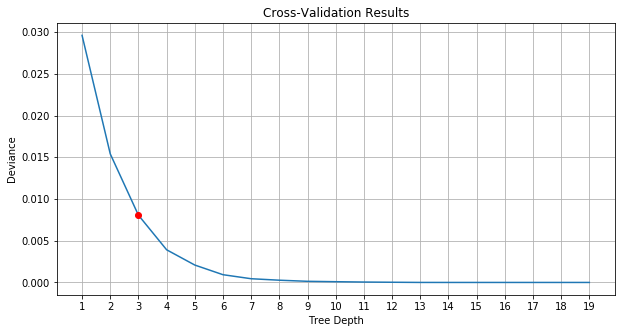

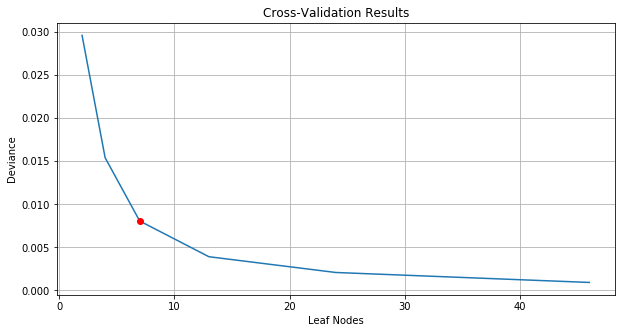

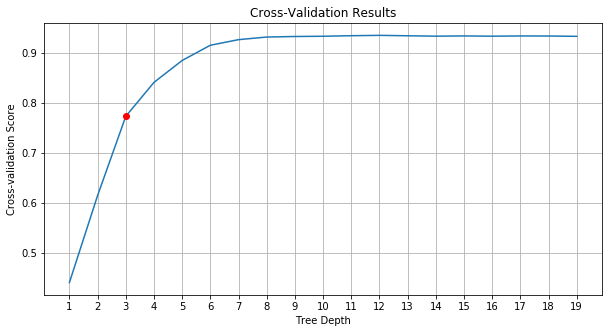

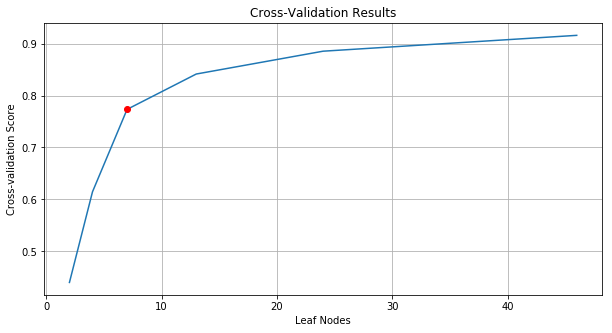

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

# Leaf nodes boolean list
def leafNodes(tree_reg):
    n_nodes = tree_reg.tree_.node_count
    children_left = tree_reg.tree_.children_left
    children_right = tree_reg.tree_.children_right
    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1
    
        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
            
    return is_leaves
    #return len(is_leaves[is_leaves == True])

sizes = []
deviance = []
scores = []
for k in range(1, 20):
    tree_regk = DecisionTreeRegressor(max_depth=k).fit(X, y)
    sse = ((y - tree_regk.predict(X)) ** 2).sum()
    is_leaves = leafNodes(tree_regk)
    d = len(is_leaves[is_leaves == True])
    dev = sse / (len(y) - d)
    sizes.append(d)
    deviance.append(dev)
    cv = cross_val_score(estimator=tree_regk, X=X, y=y, cv=10, n_jobs=1)
    scores.append(cv.mean())

fig = plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 20, step=1))
plt.plot(range(1, 20), deviance)
plt.grid(True)
plt.title('Cross-Validation Results')
plt.xlabel('Tree Depth')
plt.ylabel('Deviance')
plt.plot(3, deviance[3 - 1], 'ro')
plt.show()

fig = plt.figure(figsize=(10, 5))
#plt.xticks(np.arange(0, 20, step=1))
plt.plot(sizes[0:6], deviance[0:6])
plt.grid(True)
plt.title('Cross-Validation Results')
plt.xlabel('Leaf Nodes')
plt.ylabel('Deviance')
plt.plot(sizes[3 - 1], deviance[3 - 1], 'ro')
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 20, step=1))
plt.plot(range(1, 20), scores)
plt.grid(True)
plt.title('Cross-Validation Results')
plt.xlabel('Tree Depth')
plt.ylabel('Cross-validation Score')
plt.plot(3, scores[3 - 1], 'ro')
plt.show()

fig = plt.figure(figsize=(10, 5))
#plt.xticks(np.arange(0, 20, step=1))
plt.plot(sizes[0:6], scores[0:6])
plt.grid(True)
plt.title('Cross-Validation Results')
plt.xlabel('Leaf Nodes')
plt.ylabel('Cross-validation Score')
plt.plot(sizes[3 - 1], scores[3 - 1], 'ro')
plt.show()

## Regression Tree with depth = 3

In [8]:
tree_reg = DecisionTreeRegressor(max_depth=3).fit(X, y)

export_graphviz(
        tree_reg,
        out_file="sp500_tree1.dot",
        feature_names=returns.columns,
        rounded=True,
        filled=True
    )

!dot -Tpng sp500_tree1.dot -o sp500_tree1.png

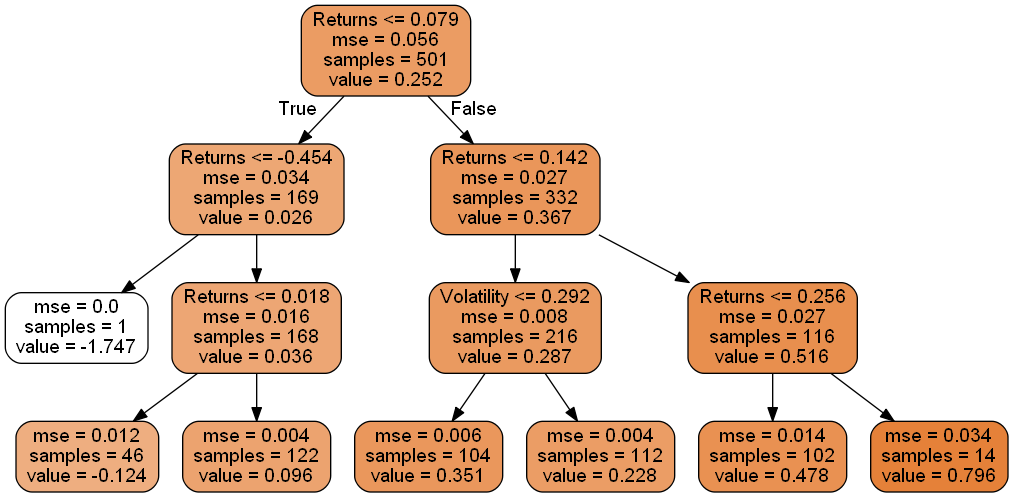

In [9]:
from IPython.display import Image
Image("sp500_tree1.png")

In [10]:
is_leaves = leafNodes(tree_reg)
d = len(is_leaves[is_leaves == True])
print('Depth of Tree: 3')
print('Number of Leaf Nodes: ', d)

Depth of Tree: 3
Number of Leaf Nodes:  7


## Model Diagnostic

RMSE:  0.0892
STD(y):  0.2358
Goodness-of-fit Measure: 0.857


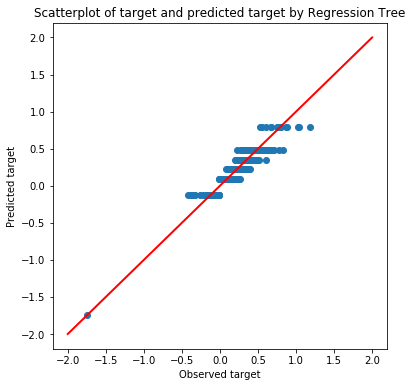

In [6]:
from sklearn.metrics import r2_score
yhat = tree_reg.predict(X)
print("RMSE: ", np.round(np.sqrt(((y - yhat)**2).mean(axis=0)),4))
print("STD(y): ", np.round(y.std(),4))
print("Goodness-of-fit Measure:", np.round(r2_score(y, yhat),4))

plt.figure(1, figsize=(6,6))
plt.title("Scatterplot of target and predicted target by Regression Tree")
plt.ylabel("Predicted target")
plt.xlabel("Observed target")
plt.scatter(y=yhat, x=y)
plt.plot([-2,2], [-2,2], "r-", linewidth=2)
plt.show()

## Clustering Plot

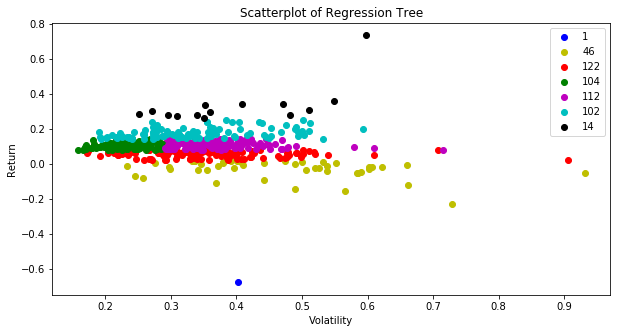

In [7]:
nodes = tree_reg.tree_.value[:,0,0][is_leaves == True]
colors = ['ob', 'oy', 'or', 'og', 'om', 'oc', 'ok']
plt.figure(figsize=(10, 5))
for i in range(0, len(nodes)):
    plt.plot(X[yhat == nodes[i],1], X[yhat == nodes[i],0], colors[i])

plt.title("Scatterplot of Regression Tree")
plt.ylabel("Return")
plt.xlabel("Volatility")
plt.legend(tree_reg.tree_.n_node_samples[is_leaves == True])
plt.show()

In [8]:
chosen_tick_tree = list(returns.index[yhat == nodes[6]])
print('Stocks with the Highest Sharpe Ratio: \n', chosen_tick_tree)

Stocks with the Highest Sharpe Ratio: 
 ['AAPL', 'AVGO', 'CHTR', 'FBHS', 'HPE', 'HII', 'ILMN', 'LYB', 'MA', 'MNST', 'NFLX', 'PCLN', 'REGN', 'TDG']


## Trading Rule

C:\Users\win8\Anaconda3\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\win8\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


annual volatility:0.05784593796083997
annual return:0.05473094449827043
sharpe ratio:0.5312550125658675
max drawdown:0.07046100810175347
max down duration:56 days
annual volatility:0.12708029463274548
annual return:0.004874593285310702
sharpe ratio:-0.15049860224168185
max drawdown:0.20110178988784985
max down duration:161 days


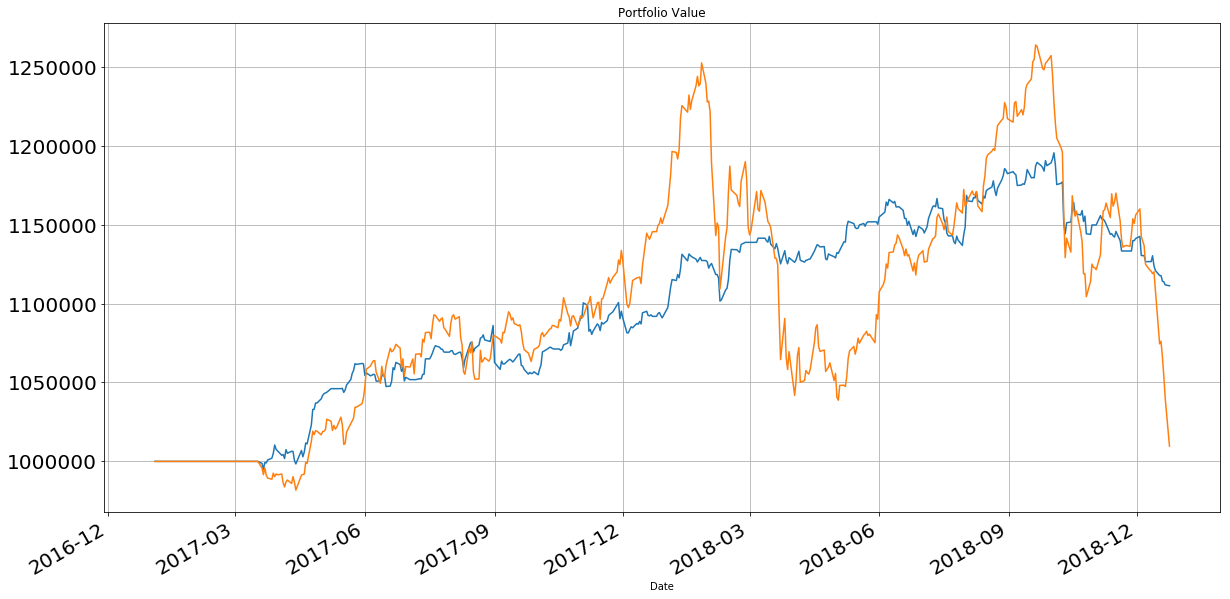

In [9]:
#####################Trading Rules#########################

chosen_tick = chosen_tick_tree ## Initialize chosen_tick

def MA(df, n):
    MA = df.rolling(n).mean()
    MA.columns = df.columns
    return MA
# Bollinger Bands
def BBANDS(df, n, multiple, H_price_name='High', L_price_name='Low', C_price_name='Adj Close'):
    MA = df.rolling(n).mean()
    MSD = df.rolling(n).std()
    ub1 = MA + multiple * MSD
    uB1 = pd.DataFrame(ub1, index=df.index, columns=df.columns)
    lb1 = MA - multiple * MSD
    lB1 = pd.DataFrame(lb1, index=df.index, columns=df.columns)
    b2 = (df - MA + multiple * MSD) / (2 * multiple * MSD)
    B2 = pd.DataFrame(b2, index=df.index, columns=df.columns)
    BBAND = pd.concat([MA, uB1, lB1, B2], keys=['Mean', 'UpperBand', 'LowerBand', '%B'], axis=1)
    return BBAND
# Average True Range
def ATR(df, n, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    i = 0
    TR_l = [0]
    while i < len(df.index) - 1:
        TR = max(df[H_price_name][i + 1], df[C_price_name][i]) - min(df[L_price_name][i + 1], df[C_price_name][i])
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l, index=df.index)
    ATR = pd.DataFrame(TR_s.ewm(span=n, min_periods=n).mean(), columns=['ATR_%s' % n])
    return ATR
# Momentum
def MOM(df, n, C_price_name='Close'):
    M = pd.Series(df[C_price_name].diff(n), name='Momentum_' + str(n))
    return M
# Keltner Channel
def KELCH(df, n, std, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    KelChM = pd.Series(df[C_price_name].rolling(n).mean())
    ATR_value = ATR(df, n, H_price_name, L_price_name, C_price_name)['ATR_%s' % n]
    KelChU = KelChM + std * ATR_value
    KelChD = KelChM - std * ATR_value

    KEL = pd.concat([KelChU, KelChM, KelChD], keys=['KelChU', 'KelChM', 'KelChD'], axis=1)
    return KEL
# Keltner Channel
def SQUEEZE(df, b_n, b_std, k_n, k_std, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    BBAND = BBANDS(df[[C_price_name]], b_n, b_std)
    BBAND.columns = BBAND.columns.get_level_values(0)
    UB_B = BBAND['UpperBand']
    LB_B = BBAND['LowerBand']

    KEL = KELCH(df, k_n, k_std, H_price_name, L_price_name, C_price_name)
    UB_K = KEL['KelChU']
    LB_K = KEL['KelChD']

    check = pd.concat([BBAND, KEL], axis=1)

    Signal = pd.DataFrame(((UB_B < UB_K) & (LB_B > LB_K)).astype(int), columns=['squeeze'])
    Signal['Momentum'] = MOM(df, k_n, C_price_name)

    return Signal, check
# Relative Strength Index
def RSI(df, n, H_price_name='High', L_price_name='Low'):
    i = 0
    UpI = [0]
    DoI = [0]
    while i + 1 <= len(df.index) - 1:
        UpMove = df[H_price_name][i + 1] - df[H_price_name][i]
        DoMove = df[L_price_name][i] - df[L_price_name][i + 1]
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.DataFrame(UpI, index=df.index)
    DoI = pd.DataFrame(DoI, index=df.index)
    PosDI = pd.DataFrame(UpI.ewm(span=n, min_periods=n - 1).mean())
    NegDI = pd.DataFrame(DoI.ewm(span=n, min_periods=n - 1).mean())
    RSI = 100.0 - 100.0 / (1 + (PosDI / NegDI))
    RSI.columns = ['RSI']
    return RSI
# MACD, MACD Signal and MACD difference
def MACD(df, n_fast, n_slow, C_price_name='Close'):
    EMAfast = df[C_price_name].ewm(span=n_fast, min_periods=n_slow - 1).mean()
    EMAslow = df[C_price_name].ewm(span=n_slow, min_periods=n_slow - 1).mean()
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=8).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    MACD = pd.concat([MACD, MACDsign, MACDdiff], axis=1)

    return MACD
def performance_matrics(port_value, output=False):
    # annual volatility
    ann_vol = np.log(port_value).diff().std() * np.sqrt(252)
    port_return = pd.DataFrame(index=port_value.index[:], columns=['Values'])
    port_return['Values'] = port_value.pct_change()

    # cumulative return series & max drawdown, max drawdown duration
    port_cum_series = pd.DataFrame(index=port_return.index[:],
                                   columns=['CumulativeReturn', 'WaterMark', 'Drawdown', 'Dwn_Duration'])

    for i in range(len(port_return)):
        if i == 0:
            port_cum_series['CumulativeReturn'].iloc[i] = 0
            port_cum_series['WaterMark'].iloc[i] = port_cum_series['CumulativeReturn'].iloc[i]
        else:
            port_cum_series['CumulativeReturn'].iloc[i] = (1 + port_return['Values'].iloc[i]) * (
                        1 + port_cum_series['CumulativeReturn'].iloc[i - 1]) - 1
            if port_cum_series['CumulativeReturn'].iloc[i] > port_cum_series['WaterMark'].iloc[i - 1]:
                port_cum_series['WaterMark'].iloc[i] = port_cum_series['CumulativeReturn'].iloc[i]
            else:
                port_cum_series['WaterMark'].iloc[i] = port_cum_series['WaterMark'].iloc[i - 1]

        port_cum_series['Drawdown'].iloc[i] = ((1 + port_cum_series['WaterMark'].iloc[i]) - (
                    1 + port_cum_series['CumulativeReturn'].iloc[i])) / (1 + port_cum_series['WaterMark'].iloc[i])
        if i == 0:
            port_cum_series['Dwn_Duration'].iloc[i] = 0
        else:
            if port_cum_series['Drawdown'].iloc[i] != 0:
                port_cum_series['Dwn_Duration'].iloc[i] = port_cum_series['Dwn_Duration'].iloc[i - 1] + 1
            else:
                port_cum_series['Dwn_Duration'].iloc[i] = 0

    max_drawdown = port_cum_series['Drawdown'].max()
    max_dwn_duration = port_cum_series['Dwn_Duration'].max()
    total_return = port_value.iloc[-1] / port_value.iloc[0] - 1

    # annual return
    ann_return = (1 + total_return) ** (1 / float((len(port_value)) / 252.0)) - 1

    # sharpe ratio
    rf = 0.024
    sharpe_ratio = (ann_return - rf) / ann_vol

    print('annual volatility:{}'.format(ann_vol.iloc[0]))
    print('annual return:{}'.format(ann_return.iloc[0]))
    print('sharpe ratio:{}'.format(sharpe_ratio.iloc[0]))
    print('max drawdown:{}'.format(max_drawdown))
    print('max down duration:{} days'.format(max_dwn_duration))
def record_transaction(symbol, action_side, date, price, quantity, fee, transaction_history):
    '''
    action_side: long or close
    date: date for executing the action
    quantity: position size
    fee: one trip cost
    transaction_history: record all the transaction here
    '''

    info = {
        'Date': date,
        'Action': action_side,
        'Price': price,
        'Quantity': quantity,
        'Fee': fee
    }
    if symbol in transaction_history:
        transaction_history[symbol].append(info)
    else:
        transaction_history.update({symbol: [info]})

    return transaction_history
def record_holdings(symbol, starting_point, price, shares_change, fee, holdings, target=np.nan):
    '''
    starting_point: date for executing the action
    quantity: +/- position size
    fee: one trip cost
    holdings: record all the stock holdings info
    target: default is "nan", or you can specify the price level you prefer
    '''
    if symbol in holdings:

        if math.isnan(target):
            target = holdings[symbol]['Target']

        info = {
            'Index': starting_point,
            'Price': price,
            'Quantity': holdings[symbol]['Quantity'] + shares_change,
            'Fee': fee,
            'Target': target
        }
        if info['Quantity'] == 0:
            del holdings[symbol]
        else:
            holdings[symbol].update(info)
    else:
        info = {
            'Index': starting_point,
            'Price': price,
            'Quantity': shares_change,
            'Fee': fee,
            'Target': target
        }
        holdings.update({symbol: info})

    return holdings

#strategy parameters
int_capital = 1000000
pos_num = 10
capital_per_trade_pct = 1. / pos_num
bband_mean = 10
bband_stdev = 1.5
b_threshold = -0.2
profit_target = 0.15
holding_target = 10 #days

Mat_col = []
for i in range(505):
    Mat_col.append(list(sp500)[i*4][0])
PriceMat = sp500[3021:] ###################
#股票名字不在chosen裡面的話 刪掉
for symbol in Mat_col:
    if symbol not in chosen_tick:
        PriceMat.drop(symbol,axis = 1,inplace=True)

#要跑挑過的就把所有Mat_col換成chosen_tick
newPriceMat = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
for symbol in chosen_tick:
    newPriceMat[symbol] = PriceMat[symbol]['Adj Close']
    
SignalMat = BBANDS(newPriceMat, bband_mean, bband_stdev)
SquSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
MoSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
for symbol in chosen_tick:
    SquSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['squeeze']
    MoSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['Momentum']

cash_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
pos_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
total_port_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])

# record transactions
holding_stocks = {}
transaction_history = {}

#Main strategy
for i in range(0, len(PriceMat)):
    if i == 0:
        cash_value.iloc[i, 0] = int_capital
        total_port_value.iloc[i, 0] = cash_value.iloc[i, 0]
    else:
        cash_value.iloc[i, 0] = cash_value.iloc[i - 1, 0]
        # do the mark to market
        for symbol in holding_stocks.keys():
            today_price = newPriceMat[symbol].iloc[i]
            shares = holding_stocks[symbol]['Quantity']
            pos_value.iloc[i, 0] += shares * today_price

        # check if postion needs to exit
        if len(holding_stocks.keys()) != 0:
            for symbol in list(holding_stocks):
                prior_day_price = newPriceMat[symbol].iloc[i - 1]
                prior_day_signal = SignalMat['Mean'][symbol].iloc[i - 1]
                today_price = newPriceMat[symbol].iloc[i]
                date = newPriceMat[symbol].index[i]
                shares = holding_stocks[symbol]['Quantity']
                # if meet criteria => exit position
                if prior_day_price >= prior_day_signal:
                    cash_value.iloc[i, 0] = cash_value.iloc[i, 0] + shares * today_price
                    pos_value.iloc[i, 0] -= shares * today_price
                    holding_stocks = record_holdings(symbol, 0, today_price, -shares, 0, holding_stocks)
                    transaction_history = record_transaction(symbol, 'close', date, today_price, shares, 0,
                                                             transaction_history)

        total_port_value.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

        # Add more positions
        if len(holding_stocks.keys()) < pos_num:
            for symbol in newPriceMat.columns:
                if symbol not in holding_stocks.keys():
                    # check if signal meets
                    prior_day_price = newPriceMat[symbol].iloc[i - 1]
                    cash_allocate = capital_per_trade_pct * total_port_value.iloc[i, 0]
                    today_price = newPriceMat[symbol].iloc[i]
                    date = newPriceMat[symbol].index[i]
                    holding_cash = cash_value.iloc[i, 0]
                    high = newPriceMat[symbol].rolling(52).max().iloc[i]
                    squee = SquSingal[symbol].iloc[i]
                    Mo = MoSingal[symbol].iloc[i]
                    if math.isnan(prior_day_price) == False and math.isnan(Mo) == False and math.isnan(high) == False and cash_allocate <= holding_cash:
                        if squee == 1 and abs(today_price - high) < high*0.05 and Mo > 0:
                            shares = cash_allocate / today_price
                            cash_value.iloc[i, 0] = holding_cash - cash_allocate
                            pos_value.iloc[i, 0] += cash_allocate
                            holding_stocks = record_holdings(symbol, i, today_price, shares, 0, holding_stocks)
                            transaction_history = record_transaction(symbol, 'long', date, today_price, shares, 0, transaction_history)
                else:
                    continue

    # update total value of portfolio
    total_port_value.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]
    
sp500 = pd.read_excel('SP500_StockPrice.xlsx', header = [0, 1])
sp500.fillna(method = 'ffill', inplace = True)
PriceMat = sp500[3021:] ####################

#要跑挑過的就把所有Mat_col換成chosen_tick
newPriceMat = pd.DataFrame(data=np.zeros((len(PriceMat), len(Mat_col))), index=pd.to_datetime(PriceMat.index[:]), columns = Mat_col)
for symbol in Mat_col:
    newPriceMat[symbol] = PriceMat[symbol]['Adj Close']

SignalMat = BBANDS(newPriceMat, bband_mean, bband_stdev)
SquSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(Mat_col))), index=pd.to_datetime(PriceMat.index[:]), columns = Mat_col)
MoSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(Mat_col))), index=pd.to_datetime(PriceMat.index[:]), columns = Mat_col)
for symbol in Mat_col:
    SquSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['squeeze']
    MoSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['Momentum']

cash_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
pos_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
total_port_value2 = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])

# record transactions
holding_stocks = {}
transaction_history = {}

#Main strategy
for i in range(0, len(PriceMat)):
    if i == 0:
        cash_value.iloc[i, 0] = int_capital
        total_port_value2.iloc[i, 0] = cash_value.iloc[i, 0]
    else:
        cash_value.iloc[i, 0] = cash_value.iloc[i - 1, 0]
        # do the mark to market
        for symbol in holding_stocks.keys():
            today_price = newPriceMat[symbol].iloc[i]
            shares = holding_stocks[symbol]['Quantity']
            pos_value.iloc[i, 0] += shares * today_price

        # check if postion needs to exit
        if len(holding_stocks.keys()) != 0:
            for symbol in list(holding_stocks):
                prior_day_price = newPriceMat[symbol].iloc[i - 1]
                prior_day_signal = SignalMat['Mean'][symbol].iloc[i - 1]
                today_price = newPriceMat[symbol].iloc[i]
                date = newPriceMat[symbol].index[i]
                shares = holding_stocks[symbol]['Quantity']
                # if meet criteria => exit position
                if prior_day_price >= prior_day_signal:
                    cash_value.iloc[i, 0] = cash_value.iloc[i, 0] + shares * today_price
                    pos_value.iloc[i, 0] -= shares * today_price
                    holding_stocks = record_holdings(symbol, 0, today_price, -shares, 0, holding_stocks)
                    transaction_history2 = record_transaction(symbol, 'close', date, today_price, shares, 0,
                                                             transaction_history)

        total_port_value2.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

        # Add more positions
        if len(holding_stocks.keys()) < pos_num:
            for symbol in newPriceMat.columns:
                if symbol not in holding_stocks.keys():
                    # check if signal meets
                    prior_day_price = newPriceMat[symbol].iloc[i - 1]
                    cash_allocate = capital_per_trade_pct * total_port_value2.iloc[i, 0]
                    today_price = newPriceMat[symbol].iloc[i]
                    date = newPriceMat[symbol].index[i]
                    holding_cash = cash_value.iloc[i, 0]
                    high = newPriceMat[symbol].rolling(52).max().iloc[i]
                    squee = SquSingal[symbol].iloc[i]
                    Mo = MoSingal[symbol].iloc[i]
                    if math.isnan(prior_day_price) == False and math.isnan(Mo) == False and math.isnan(high) == False and cash_allocate <= holding_cash:
                        if squee == 1 and abs(today_price - high) < high*0.05 and Mo > 0:
                            shares = cash_allocate / today_price
                            cash_value.iloc[i, 0] = holding_cash - cash_allocate
                            pos_value.iloc[i, 0] += cash_allocate
                            holding_stocks = record_holdings(symbol, i, today_price, shares, 0, holding_stocks)
                            transaction_history = record_transaction(symbol, 'long', date, today_price, shares, 0,
                                                                     transaction_history)
                else:
                    continue

    # update total value of portfolio
    total_port_value2.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]
    
total_port_value.iloc[:, 0].plot(figsize=(20, 10), title='Portfolio Value', fontsize=20, grid=True)
total_port_value2.iloc[:, 0].plot(figsize=(20, 10), title='Portfolio Value', fontsize=20, grid=True)

performance_matrics(total_port_value)##chosen_tick
performance_matrics(total_port_value2)##沒挑過